# Task 1
Implementate un programma che – dato un ID, identificatore di una immagine, e dato uno dei seguenti modelli, estragga e stampi (in un formato comprensibile per un utente umano) i corrispondenti descrittori di feature:

In [186]:
from PIL import Image
from numpy import asarray
import numpy as np
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

# Implementazione dei Color Moments

Color moments, CM8x8:
Suddividete l’immagine in finestre di dimensione 8x8, calcolate i momenti del colore per ciascuna finestra e
 concatenate questi momenti del colore per ottenere un descrittore unificato.

--------------

Implementazione dei **Color Moments**:
- Mean;
- Standard Deviation;
- Skewness.

> **Nota bene:** Questa implementazione restituisce come descrittore di un'immagine un vettore formato da 3 elementi: [*mean*, *std*, *skewness*]

Per calcolare i ColorMoments abbiamo calcolato mean, std e skewness per ogni singola sottoimmagine delle 64 ottenute dividendo l'immaginane iniziale e concatenando tutti questi valori otteneno un descrittore da 192 elementi in modo tale da non perdere informazioni rispetto alla **LOCALITA'**.

In [187]:
# funzione che calcola il decrittore specificato per l'immagine data in input
# parametri:
# imageID: nome del file dell'immagine
# modelName: nome del descrittore che vogliamo calcolare

def ottieniDescrittore(imageID, modelName):
    match modelName:
        case 'ColorMoments':
            # apriamo l'immagine
            image = Image.open('./olivetti_PNG_master/images/' + imageID)

            # convertiamo l'immagine in un numpy array
            data = asarray(image)
            print(data)

            print("DATA di 0 - prima riga")
            print(data[0])

            print("num cols: ", len(data[0]))
            print("num rows: ", len(data))
            arrayOf64LittleImages = getArrayOf64LittleImages(data)
            print("QUESTA LEN arrayOf64LittleImages: ", len(arrayOf64LittleImages))

            print("arrayOf64LittleImages: ", len(arrayOf64LittleImages[0]))
            
            print("arrayOf64LittleImages: ",arrayOf64LittleImages[0])


            # test per visualizzare le 64 sottoimmagini ottenute
            # for i in range (len(arrayOf64LittleImages[0])):
            #     print("indice ", i)
            #     print(arrayOf64LittleImages[0][i])
            #     img = Image.fromarray(arrayOf64LittleImages[0][i])
            #     plt.imshow(img, cmap ="gray")
            #     plt.show()

            return getColorMoments(arrayOf64LittleImages[0])

        case 'LBP':
            image = Image.open('./olivetti_PNG_master/images/' + imageID)
            print("SONO QUA 1")

            # convertiamo l'immagine in un numpy array
            data = asarray(image)
            print("SONO QUA 2")

            arrayOf64LittleImages = getArrayOf16LittleImages(data)
            print("SONO QUA 3")
            print("LEN : ", len(arrayOf64LittleImages))
            return getLBPCorrect(arrayOf64LittleImages[0])
            #return lbp_histogram(imageID)  # getLBPdescriptor(imageID)

        case 'HOG':
            return getHOGfeatures('./olivetti_PNG_master/images/' + imageID)

        case _:
            return "Errore, inserire un descrittore corretto"

##*****************************************************

def ottieniDescrittoreSecondaParte(imageID, modelName):
    match modelName:
        case 'ColorMoments':
            # apriamo l'immagine
            print(imageID)
            image = Image.open('./secondaparte/images/' + imageID)

            # convertiamo l'immagine in un numpy array
            data = asarray(image)
            arrayOf64LittleImages = getArrayOf64LittleImages(data)

            return getColorMoments(arrayOf64LittleImages[0])

        case 'LBP':
            return lbp_histogram_secondaparte(imageID)  # getLBPdescriptor(imageID)

        case 'HOG':
            return getHOGfeatures('./secondaparte/images/' + imageID)

        case _:
            return "Errore, inserire un descrittore corretto"

##************************************************************************

def ottieniDescrittoreOfAnyImages(imageID, modelName):
    match modelName:
        case 'ColorMoments':
            # apriamo l'immagine
            print(imageID)
            image = Image.open(imageID).convert('L')

            if 'otherImages' in imageID:
                image = image.resize((64, 64))

            # convertiamo l'immagine in un numpy array
            data = asarray(image)
            arrayOf64LittleImages = getArrayOf64LittleImages(data)

            return getColorMoments(arrayOf64LittleImages[0])

        case 'LBP':
            # # apriamo l'immagine
            # #print(imageID)
            # image = Image.open(imageID).convert('L')

            # if 'otherImages' in imageID:
            #     image = image.resize((64, 64))

            # # convertiamo l'immagine in un numpy array
            # data = asarray(image)
            # arrayOf64LittleImages = getArrayOf16LittleImages(data)

            return lbp_histogram_secondaparte_task567(imageID)  # getLBPdescriptor(imageID)

        case 'HOG':
            return getHOGfeatures(imageID)

        case _:
            return "Errore, inserire un descrittore corretto"


# funzione che calcola i color moments (mean, std e skewness) per l'immagine data in input
# parametri:
    # arrayOf64LittleImages: array contenente 64 matrici (ogni matrice corrisponde ad una mattonella)


def getColorMoments(arrayOf64LittleImages):
    arrayOfColorMoments = []

    print("Lunghezza array arrayOf64LittleImages: ", len(arrayOf64LittleImages))

    for i in range(0, len(arrayOf64LittleImages)):
        arrayOfColorMoments.append(arrayOf64LittleImages[i].mean())

    for i in range(0, len(arrayOf64LittleImages)):
        arrayOfColorMoments.append(arrayOf64LittleImages[i].std())

    for i in range(0, len(arrayOf64LittleImages)):
        # print("indice i ", i)
        # print(arrayOf64LittleImages[i])
        # print(skew(arrayOf64LittleImages[i]))
        # print(skew(arrayOf64LittleImages[i].reshape(-1)))
        arrayOfColorMoments.append(skew(arrayOf64LittleImages[i].reshape(-1))) # usiamo il reshape per trasformare la matrice in un vettore e calcoliamo la slewness del vettore

    # il primo elemento è la media totale dell'immagine, il secondo la std e il terzo la skewness
    print("Lunghezza arrayOfColorMoments: ", len(arrayOfColorMoments))

    return arrayOfColorMoments

# funzione che divide l'immagine in input in 64 matrici più piccole (mattonelle)
# parametri:
    # data: l'immagine in forma di numpy array (ovvero una matrice numerica in cui ogni valore indica il colore del pixel in scala di grigi)

def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""
    print("Sono in split")

    r, h = array.shape

    print("r: ", r, ", h:", h)

    print("prima del return")
    return (array.reshape(h//nrows, nrows, -1, ncols)
                 .swapaxes(1, 2)
                 .reshape(-1, nrows, ncols))


def getArrayOf64LittleImages(data):
    A = split(data, 8, 8)

    print("Numero di sottoimmagini: ", len(A))

    return [A]

def getArrayOf16LittleImages(data):
    A = split(data, 16, 16)

    print("Numero di sottoimmagini: ", len(A))

    return [A]


In [188]:
ottieniDescrittore('image-1.png', 'ColorMoments')

[[127 133 147 ...  34  32  32]
 [124 137 150 ...  42  41  41]
 [141 149 154 ...  38  39  39]
 ...
 [239 242 246 ...  17  17  17]
 [239 240 245 ...  15  15  15]
 [236 245 242 ...  20  20  20]]
DATA di 0 - prima riga
[127 133 147 163 176 192 207 214 217 214 217 213 214 216 216 219 219 216
 213 219 213 221 224 229 233 239 238 243 236 233 224 229 226 220 216 219
 220 217 217 216 214 214 214 210 207 210 208 203 205 201 197 198 192 185
 184 170 143  93  77  42  35  34  32  32]
num cols:  64
num rows:  64
Sono in split
r:  64 , h: 64
prima del return
Numero di sottoimmagini:  64
QUESTA LEN arrayOf64LittleImages:  1
arrayOf64LittleImages:  64
arrayOf64LittleImages:  [[[127 133 147 ... 192 207 214]
  [124 137 150 ... 201 216 217]
  [141 149 154 ... 210 217 217]
  ...
  [173 195 207 ... 213 213 210]
  [203 214 214 ... 213 207 208]
  [213 214 213 ... 208 207 205]]

 [[217 214 217 ... 216 216 219]
  [220 219 216 ... 214 214 211]
  [220 217 220 ... 216 217 217]
  ...
  [211 210 205 ... 211 214 219]

[192.46875,
 213.15625,
 225.765625,
 234.21875,
 217.8125,
 210.40625,
 197.703125,
 65.0,
 209.328125,
 191.890625,
 160.328125,
 186.125,
 214.96875,
 183.03125,
 172.140625,
 62.90625,
 216.578125,
 185.484375,
 159.703125,
 173.453125,
 218.015625,
 154.703125,
 157.375,
 59.359375,
 222.0625,
 212.59375,
 209.390625,
 206.21875,
 209.4375,
 193.34375,
 186.671875,
 60.015625,
 235.4375,
 229.21875,
 208.75,
 197.34375,
 208.1875,
 190.46875,
 190.375,
 31.875,
 236.296875,
 237.984375,
 208.890625,
 183.96875,
 167.46875,
 192.4375,
 141.96875,
 22.9375,
 218.0,
 239.921875,
 210.5,
 195.828125,
 173.203125,
 179.984375,
 65.640625,
 22.5,
 229.90625,
 205.09375,
 200.328125,
 190.03125,
 191.9375,
 155.015625,
 15.21875,
 18.5625,
 27.474970854170163,
 4.880505705098602,
 7.1539809448568565,
 6.377373945245801,
 3.427257467713799,
 4.285581750182815,
 10.872384293906052,
 42.09438798699893,
 9.700281386865795,
 30.471358061454612,
 37.60072085724388,
 28.901502988599052,
 9.1633

# Implementazione HOG features

Se necessario, utilizzate I seguenti valori per i parametri richiesti If needed use the following parameter settings:
- numero di orientation bins = 9,
- dimensione della cella = 8,
- dimensione del blocco = 2,
- oriented gradients (yes/no) = no, and 0 otherwise.
- L2-norm clipping threshold = 0.2

---------------------

Implementazione delle **HOG features**.

Spiegazione HOG computation: https://www.youtube.com/watch?v=28xk5i1_7Zc

In [189]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

def getHOGfeatures(imageID):
        # reading the image
    img = imread(imageID, 0)

    if 'otherImages' in imageID:
        img = Image.open(imageID).convert('L')
        img = img.resize((64, 64))

    # resizing image
    resized_img = resize(img, (128*1, 64*1))

    #creating hog features
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True)

    # plt.axis("off")
    # plt.imshow(hog_image, cmap="gray")

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    print(fd)     #fd è di lunghezza 3780

    return fd

In [190]:
#getHOGfeatures('image-222.png')
ottieniDescrittore('image-1.png', 'HOG')

[0.48765299 0.48765299 0.         ... 0.08296451 0.01249152 0.03335891]


array([0.48765299, 0.48765299, 0.        , ..., 0.08296451, 0.01249152,
       0.03335891])

# Implementazione LBP

Extended Local binary patterns, ELBP:
Calcolate le features ELBP per l’immagine data.

> **Nota bene:** La traccia richiedeva di implementare ELBP, ma noi non abbiamo trovato nulla cercando online.

### Prima implementazione LBP

In [191]:
#https://www.geeksforgeeks.org/create-local-binary-pattern-of-an-image-using-opencv-python/

import cv2
import numpy as np
from matplotlib import pyplot as plt
   
      
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
    
    # pixel che considero come "centro"
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val
   
def getLBPdescriptor(imageID):
    path = './olivetti_PNG_master/images/' + imageID
    img_bgr = cv2.imread(path, 1)
   
    height, width, _ = img_bgr.shape
    
    # We need to convert RGB image 
    # into gray one because gray 
    # image has one channel only.
    img_gray = cv2.cvtColor(img_bgr,
                            cv2.COLOR_BGR2GRAY)
    
    # Create a numpy array as 
    # the same height and width 
    # of RGB image
    img_lbp = np.zeros((height, width),
                    np.uint8)
    
    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

    return img_lbp

In [192]:
getLBPdescriptor('image-0.png')

array([[120,  56,  56, ..., 224, 224, 224],
       [ 60,  60,  60, ..., 227, 225, 193],
       [ 30,  28,  60, ..., 225, 227, 195],
       ...,
       [  0, 185,   0, ..., 223,  30,   0],
       [ 62,  13, 146, ..., 255,  46,   3],
       [ 14,   6, 143, ...,  13,   6, 131]], dtype=uint8)

### Seconda implementazione LBP

In [193]:
def getLBPimage(gray_image):
    '''
    == Input ==
    gray_image  : color image of shape (height, width)
    
    == Output ==  
    imgLBP : LBP converted image of the same shape as 
    '''
    
    ### Step 0: Step 0: Convert an image to grayscale
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    gray_image = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)
    
    imgLBP = np.zeros_like(gray_image)

    print(gray_image.shape)

    neighboor = 3
    for ih in range(0,gray_image.shape[0] - neighboor):
        for iw in range(0,gray_image.shape[1] - neighboor):
            ### Step 1: 3 by 3 pixel
            img          = gray_image[ih:ih+neighboor,iw:iw+neighboor]
            center       = img[1,1]
            img01        = (img >= center)*1.0  # matrice di 9 pixel che contiene 1 se il valore del pixel è maggiore del valore di center

            vector =  [0] * 8 # inizializzo un vettore con 8 zeri

            vector[0] = img01[0][0]
            vector[1] = img01[0][1]
            vector[2] = img01[0][2]
            vector[3] = img01[1][2]
            vector[4] = img01[2][2]
            vector[5] = img01[2][1]
            vector[6] = img01[2][0]
            vector[7] = img01[1][0]
            
            ### Step 3: Decimal: Convert the binary operated values to a digit.
            where_img01_vector = np.where(vector)[0]

            print("where_img01_vector")
            print(where_img01_vector)

            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num

            print("NUM")
            print(num)

    return(imgLBP)

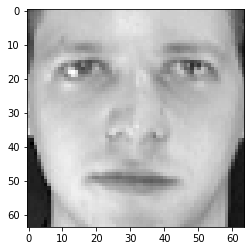

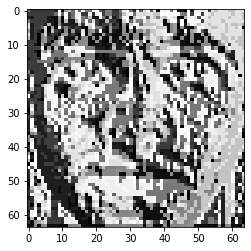

[[120  56  56 ... 224 224 224]
 [ 60  60  60 ... 227 225 193]
 [ 30  28  60 ... 225 227 195]
 ...
 [  0 185   0 ... 223  30   0]
 [ 62  13 146 ... 255  46   3]
 [ 14   6 143 ...  13   6 131]]
LBP Program is finished


In [194]:
path = './olivetti_PNG_master/images/image-0.png'
img_bgr = cv2.imread(path, 1)
   
height, width, _ = img_bgr.shape
   
# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)
   
# Create a numpy array as 
# the same height and width 
# of RGB image
img_lbp = np.zeros((height, width),
                   np.uint8)
   
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  
plt.imshow(img_bgr)
plt.show()
   
plt.imshow(img_lbp, cmap ="gray")
plt.show()

print(img_lbp)
   
print("LBP Program is finished")

(64, 64)
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[1 4 5 6]
NUM
114
where_img01_vector
[0 1 2 3 4 5 6 7]
NUM
255
where_img01_vector
[1 2 5 6]
NUM
102
where_img01_vector
[0 1 2 3 4 5 6 7]
NUM
255
where_img01_vector
[0 2 3 4 5]
NUM
61
where_img01_vector
[4 5 6]
NUM
112
where_img01_vector
[0 4 5 6 7]
NUM
241
where_img01_vector
[1 3 4 5 6 7]
NUM
250
where_img01_vector
[3 4 5]
NUM
56
where_img01_vector
[3 4 5]
NUM
56
where_img01_vector
[3 4 5 6 7]
NUM
248
where_img01_vector
[4 5]
NUM
48
where_img01_vector
[4 5 6 7]
NUM
240
where_img01_vector
[1 2 3 4 5 6 7]
NUM
254
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5 6]
NUM
124
where_img01_vector
[2 3 4 5 6]
NUM
124
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vecto

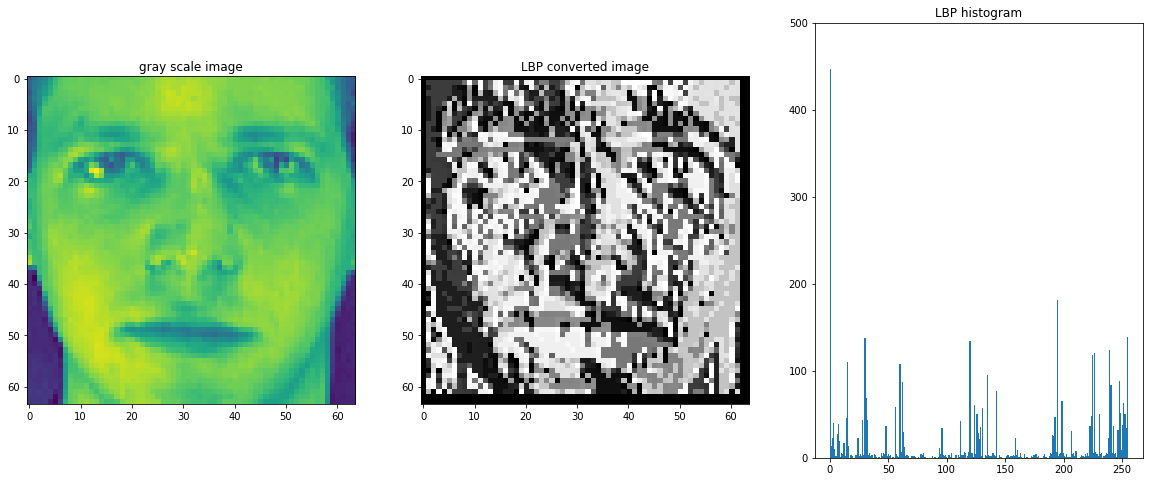

In [195]:
import cv2, os 

# dir_images = "LBPdata/"
# imgs = os.listdir(dir_images)
#for imgnm in imgs:

path = './olivetti_PNG_master/images/image-0.png'
img_bgr = cv2.imread(path, 1)

gray_image = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)

imgLBP    = getLBPimage(img_bgr)

vecimgLBP = imgLBP.flatten()

fig = plt.figure(figsize=(20,8))
ax  = fig.add_subplot(1,3,1)
ax.imshow(gray_image)
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(imgLBP,cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vecimgLBP,bins=2**8)
ax.set_ylim(0,500)
lbp = lbp[:-1]
## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
    ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

### Terza implementazione LBP - Implementazione usata nel progetto

>**NB**: Come descrittore LBP attualmente usiamo l'istrogramma basandoci sulle frequenze.

Bin dell'istrogramma: [0, 1, 2, 3, 4, 5, 6, 7, ...]

Descrittore basato sul conteggio dei pixel con un certo valore: [132  45   6  27  56  10  32  88 ...]

Descrittore basato sulla frequenza dei pixel con un certo valore: [0.03222656 0.01098633 0.00146484 0.0065918  0.01367188 0.00244141 0.0078125  0.02148438 ...]

*Come otteniamo il valore della frequenza?* Il valore si ottiene prendendo il numero di pixel con un certo valore e dividendolo per (64*64), ovvero il numero totale di pixel.

**Esempio**: $$ \frac{132}{64 * 64}\ = 0.03222656  $$

In [196]:
import numpy as np
from skimage import io, color
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
from matplotlib import cm

def lbp_histogram_final(img):
    print("IMG NELLA FUNZIONE FINALE LBP: ", img)
    patterns = local_binary_pattern(img, 8, 1)
    print("STAMPO PATTERNS")
    print(patterns)

    for i in range(len(patterns)):
        print(patterns[i])

    #plt.imshow(patterns, cmap ="gray")
    #plt.show()
    hist, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=False)    # Usando density = False otteniamo il conteggio dei pixel con quel valore, non la frequenza
    return hist

def lbp_histogram(imageID):
    img = Image.open('./olivetti_PNG_master/images/' + imageID)
    patterns = local_binary_pattern(img, 8, 1)
    print("STAMPO PATTERNS")
    print(patterns)

    for i in range(len(patterns)):
        print(patterns[i])

    #plt.imshow(patterns, cmap ="gray")
    #plt.show()
    hist, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=False)    # Usando density = False otteniamo il conteggio dei pixel con quel valore, non la frequenza
    return hist

def lbp_histogram_secondaparte(imageID):
    img = Image.open('./secondaparte/images/' + imageID)
    patterns = local_binary_pattern(img, 8, 1)
    #print(patterns)
    #plt.imshow(patterns, cmap ="gray")
    #plt.show()
    hist, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=True)
    return hist

def lbp_histogram_secondaparte_task567(imageID):
    print("LBP 1")
    img = Image.open(imageID).convert('L')
    print("LBP 2")

    if 'otherImages' in imageID:
        print("il path contiene otherImages")
        img = img.resize((64, 64))
    
    print("LBP 3")

    patterns = local_binary_pattern(img, 8, 1)
    print("LBP 4")

    #print(patterns)
    #plt.imshow(patterns, cmap ="gray")
    #plt.show()
    hist, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=True)
    return hist

img_bgr_feats = lbp_histogram('image-0.png')

print(len(img_bgr_feats))
print(img_bgr_feats)


def getLBPCorrect(arrayOf64LittleImages):
    arrayOfLBP = []

    print("LBP Lunghezza array: ", len(arrayOf64LittleImages))

    for i in range(0, len(arrayOf64LittleImages)):
        # im = Image.fromarray(np.uint8(cm.gist_earth(arrayOf64LittleImages[i])*255))
        # print("IM: ", im)
        hist = lbp_histogram_final(arrayOf64LittleImages[i])
        print("hist: ", hist)

        arrayOfLBP.append(hist)

    print("Lunghezza arrayOfLBP: ", len(arrayOfLBP))
    print(arrayOfLBP)
    
    return arrayOfLBP



STAMPO PATTERNS
[[193. 193. 193. ... 112. 112. 112.]
 [195. 195. 195. ... 124. 120.  56.]
 [135. 131. 195. ... 120. 124.  60.]
 ...
 [  0. 249.   0. ... 159. 135.   0.]
 [199.   3.  28. ... 255.  71.  12.]
 [  7.   6.  31. ...   3.   6.  28.]]
[193. 193. 193. 193. 193. 193. 193. 193.  64. 241.   0.  16. 209.  96.
 241. 224. 241. 225. 225. 240. 241. 129. 193. 193. 225. 193. 193. 225.
 112. 241. 225. 192. 241.  96. 112. 241.  96. 113.   0. 241. 112. 241.
 193. 241. 129. 129.   0. 241.  64. 112. 240. 112. 241.   0. 112.  48.
 112. 112. 112.  48.  48. 112. 112. 112.]
[195. 195. 195. 195. 195. 195. 195. 195. 228. 255.  70. 255. 195. 224.
 240. 245. 193. 193. 241. 192. 240. 255. 193. 227. 195. 195. 195.  64.
  48. 240. 243. 224. 112. 112.  56. 120. 116.  62.  60. 255. 253. 241.
 247. 255. 255. 239. 108. 251.   0. 253. 241.  32. 248. 124.  60. 124.
 124. 120. 120. 124.  60. 124. 120.  56.]
[135. 131. 195. 195. 195. 195. 131.   3.   1.  17.   0. 255. 195. 193.
 112. 243. 199.   7. 223. 133. 12

STAMPO PATTERNS
[[193. 224. 240. ...   0.  48. 112.]
 [193. 225. 241. ...  30.  29.  24.]
 [193. 241. 225. ... 126. 255.  12.]
 ...
 [  7.  15.  15. ...   0. 112. 124.]
 [  7.  15.  14. ... 231.  12.  24.]
 [  7.  15.  30. ...   0.  31.  28.]]
[193. 224. 240. 241. 193.   0. 240. 240. 240. 240. 240. 240. 241. 225.
 224. 240. 241. 225. 225. 225. 225. 225. 225. 224. 241. 225. 225. 113.
  16. 176. 240. 241. 225. 225. 241.   1.   0.  16. 240. 240. 241.  97.
   0.  17.   0. 241.   1.  16. 241.  64. 241.   1. 209. 113.   1.  16.
  80.  48.  17. 129.   1.   0.  48. 112.]
[193. 225. 241. 225. 224. 255. 233. 225. 224. 240. 240. 241. 225. 225.
 225. 225. 225. 225. 225.   0. 209. 240. 240. 241. 241. 224. 241. 240.
 254. 253. 225. 240. 240. 241. 226. 255. 110. 124. 248. 248. 240. 248.
 255. 239.  44.  24. 255. 255.   1.  21.  16. 255.   7.   0. 254. 255.
   4.  28. 255. 239.   7.  30.  29.  24.]
[193. 241. 225. 225. 224. 240. 241. 241. 225. 224. 241. 225. 225. 225.
 225. 129.   1.   0. 208. 247. 23

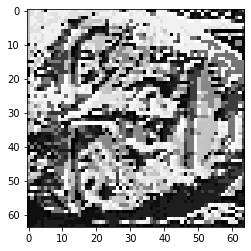

256
[132  78   5  37  45   5  26 105   6   0   0   0  27   6  40 126  56  16
   1   7  10   3   2   3  32   7   1   1  88   5 153 122   4   1   0   1
   0   0   0   0   0   0   0   0   3   0   0   2  34   1   2   2   2   0
   0   0  41   2   1   3 118   2  44  29  47   4   0   3   9   1   4   6
   1   1   0   0   6   0   2   3   6   2   0   0   1   0   0   0   2   0
   0   0   2   0   3   5  35   8   0   1   3   1   2   1   2   0   0   0
   3   1   3   2 100   4   0   0   7   0   2   0 103   3   0   2  96   3
  20  15   4  40   0  46   0   5   1 139   0   0   0   1   0   0   1  46
   0   3   0   2   0   0   1   1   1   0   0   2   1   4   1  43   0   0
   0   0   0   0   0   1   0   0   0   0   0   0   0   2   2   7   0   3
   0   0   0   0   0   0   0   5   0   0   3  28  30  91   0 136   4   2
   3 124   1   1   0   3   1   3   2  61   7  10   0   3   1   0   0   5
   2   0   0   0   0   0   1  25  53 151   3  60   1   4   1  43   1   3
   0   2   1   1   5  51 198 163   1  32   2   

In [197]:
import cv2
import numpy as np

def lbp_histogram_test_rotation(imageID):
    img = Image.open('./olivetti_PNG_master/images/' + imageID)
    rotated_image1 = img.rotate(90)

    patterns = local_binary_pattern(rotated_image1, 8, 1)
    print("STAMPO PATTERNS")
    print(patterns)

    for i in range(len(patterns)):
        print(patterns[i])

    plt.imshow(patterns, cmap ="gray")
    plt.show()
    hist, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=False)    # Usando density = False otteniamo il conteggio dei pixel con quel valore, non la frequenza
    return hist

img_bgr_feats = lbp_histogram_test_rotation('image-0.png')

print(len(img_bgr_feats))
print(img_bgr_feats)


198


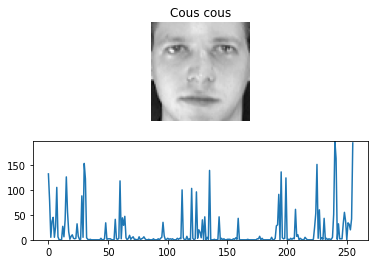

In [198]:
import matplotlib.pyplot as plt

hmax = img_bgr_feats.max()
print(hmax)
fig, ax = plt.subplots(2)

ax[0].imshow(img_bgr)
ax[0].axis('off')
ax[0].set_title('Cous cous')
ax[1].plot(img_bgr_feats)
ax[1].set_ylim([0, hmax])

plt.show(fig)

In [199]:
ottieniDescrittore('image-0.png', 'LBP')

SONO QUA 1
SONO QUA 2
Sono in split
r:  64 , h: 64
prima del return
Numero di sottoimmagini:  16
SONO QUA 3
LEN :  1
LBP Lunghezza array:  16
IMG NELLA FUNZIONE FINALE LBP:  [[ 73  92 108 116 143 169 185 191 195 194 199 198 197 198 195 197]
 [ 84 104 114 125 151 174 189 194 195 194 197 195 198 199 198 197]
 [ 84 108 118 138 158 181 191 195 197 197 198 195 199 201 201 199]
 [ 72 105 125 142 165 183 190 191 194 194 197 195 201 202 202 201]
 [ 81 109 126 161 179 187 187 190 193 191 193 195 199 201 202 202]
 [ 74 100 126 170 183 183 187 186 190 186 190 193 197 199 201 202]
 [ 73  94 145 183 185 181 183 181 186 187 194 194 197 197 201 202]
 [ 58  90 153 183 181 177 178 181 186 191 186 186 193 195 199 203]
 [ 53  85 162 178 177 174 175 183 187 185 167 181 191 195 195 198]
 [ 58  74 165 175 173 173 178 185 183 170 159 177 183 182 185 182]
 [ 65  74 166 171 170 171 179 179 178 169 166 171 175 171 161 157]
 [ 68  80 163 169 169 173 170 171 167 174 177 167 167 165 146 139]
 [ 68  86 163 173 171 

[array([ 8,  9,  3,  6,  2,  1,  8,  9,  0,  0,  0,  0,  1,  0,  4,  2,  4,
         1,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  6,  0, 10,  8,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  2,  2,  2,  0,  1,
         2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0, 13,
         0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  2,  0, 12,  0, 37,  1,  0,  0, 14,  0,  0,  0,  0,
         0,  0,  0,  5,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0, 